# Modelling Similarity Between Two Documents

Documents can have similar words or similar intent. We'll start with the simpler concept of similar words. This is commonly used to identify things such as automated emails and fraud. 

In [1]:
doc1 = "Still no reply about my bill"
doc2 = "Still no reply from my parrot"
doc3 = "my waiter was rude"

## Bag of Words Model
This is the simplest way of comparing documents, we simply split the words into an unordered set and consider the document to be this unordered set of words.

### Bag of Words Method 1 - Comparing the sets

Here we compare these sets using a Jacardian Index, which the size of the intersection of two sets, divided by the union of two sets:

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7>


In [2]:
def jacard_index(setA, setB):
  intersection = setA.intersection(setB)
  return len(intersection) / (len(setA) + len(setB) - len(intersection))

set1 = set(doc1.split())
set2 = set(doc2.split())
set3 = set(doc3.split())

print("Jacard similarity of doc1 compared to doc2:")
print(jacard_index(set1, set2))

print("Jacard similarity of doc1 compared to doc3:")
print(jacard_index(set1, set3))

print("Jacard similarity of doc2 compared to doc3:")
print(jacard_index(set2, set3))

print("Jacard similarity of doc1 compared to doc1:")
print(jacard_index(set1, set1))

Jacard similarity of doc1 compared to doc2:
0.5
Jacard similarity of doc1 compared to doc3:
0.1111111111111111
Jacard similarity of doc2 compared to doc3:
0.1111111111111111
Jacard similarity of doc1 compared to doc1:
1.0


The problem with this approach is that the Jacard index is difficult to interpret and is quite abstract. A Jacard index only shows us how the two documents have some sort of overlap, in this representation it is unclear what the direction of the overlap is. We only know some proportion of words are similar:

In [36]:
sub_sentence = "This is a part"
sub_sentence_set = set(sub_sentence.split())
full_sentence = "This is a part of a whole sentence."
full_sentence_set = set(full_sentence.split())

print("Jacard similarity of sub_sentence compared to full_sentence:")
print(jacard_index(sub_sentence_set, full_sentence_set))

Jacard similarity of sub_sentence compared to full_sentence:
0.5714285714285714


## Bag of words method 2 - One Hot Vector vectoriser

One hot encoding is an encoding technique where each item we are trying to encode is encoded with a 0 or 1 whether it is present or not. As such a bag of document becomes an array of zeros and ones where each one represents that a word is in a document and each zero represents that a word is not there.

Lets start by creating a vocabulary which is simply a unique list of all the words in our document:

In [3]:
vocabulary = set1.union(set2).union(set3)
print(vocabulary)

{'reply', 'from', 'parrot', 'no', 'about', 'waiter', 'my', 'bill', 'was', 'Still', 'rude'}


Now lets create a dictionary which will assign a unique number to each word e.g. 'parrot = 4'

In [4]:
dictionary = dict(zip(vocabulary, range(len(vocabulary))))
print(dictionary)

def build_dictionary(documents):
    print(documents)
    vocabulary = set()
    for document in documents:
        vocabulary = vocabulary.union(set(document.split()))
    print(vocabulary)
    print(len(vocabulary))
    print(list(zip(vocabulary, range(len(vocabulary)))))
    vocabulary_dictionary = dict(list(zip(vocabulary, range(len(vocabulary)))))
    print(vocabulary_dictionary)
    return vocabulary_dictionary

{'rude': 10, 'my': 6, 'bill': 7, 'reply': 0, 'was': 8, 'from': 1, 'Still': 9, 'parrot': 2, 'no': 3, 'about': 4, 'waiter': 5}


Now we can convert each document into a vector where the position in that vector is the uniqe dictionary number. As an example, a very simple dictionary for the documents 'red cat' and 'blue cat' would give us something like: 

dictionary = [{'red', 0}, {'blue', 1}, {'cat', 2}]

the document red cat would be vectorised as [1,0,1] and the document 'blue cat' would be [0,1,1]

Let's vectorise our doc1, doc2, doc3:

In [6]:
def vectorise(document, vocabulary_dictionary):
    # initialise vector of 0 of the length of the vocabulary
    vector = [0]*(len(vocabulary_dictionary.keys()))
    for word in document.split():
        vector[vocabulary_dictionary[word]] = 1
    print(document + " = " + str(vector))
    return vector

docs = [doc1, doc2, doc3]

print("dictionary:")
print(dictionary)
print("")
print("documents and vectors:")
vectors = [vectorise(doc, dictionary) for doc in docs]

dictionary:
{'rude': 10, 'my': 6, 'bill': 7, 'reply': 0, 'was': 8, 'from': 1, 'Still': 9, 'parrot': 2, 'no': 3, 'about': 4, 'waiter': 5}

documents and vectors:
Still no reply about my bill = [1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]
Still no reply from my parrot = [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
my waiter was rude = [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1]


### How do we use these vectors to compare documents ?

This is done by calculating the angle between two vectors. The closer the angle the more similar the vectors (and the documents they represent) are. Because we're only human we can only visualise this by returning to our much simpler documents above, 'red cat' and 'blue cat'

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

simplified_doc1 = "red cat"
simplified_doc2 = "blue cat"

simplified_set1 = set(simplified_doc1.split())
simplified_set2 = set(simplified_doc2.split())

simple_vocab = simplified_set1.union(simplified_set2)
simple_dictionary = dict(zip(simple_vocab, range(len(simple_vocab))))

print("dictionary is " + str(simple_dictionary))
simple_vectors = [vectorise(doc, simple_dictionary) for doc in [simplified_doc1, simplified_doc2] ]

dictionary is {'cat': 0, 'blue': 2, 'red': 1}
red cat = [1, 1, 0]
blue cat = [1, 0, 1]


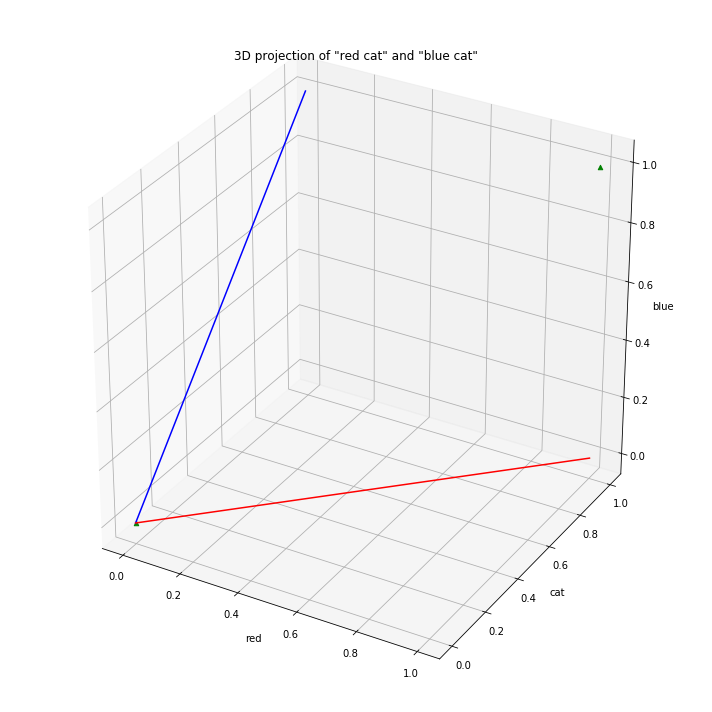

In [8]:
#3D plot
def plot_point(vector, colour, marker):
    x = vector[0]
    y = vector[1]
    z = vector[2]
    ax.scatter(x, y, z, c=colour, marker=marker)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
VecStart_x = [0]*2
VecStart_y = [0]*2
VecStart_z = [0]*2
VecEnd_x = [0,1]
VecEnd_y = [1,1]
VecEnd_z  =[1,0]
colour = ["blue","red"]
for i in range(2):
    ax.plot([VecStart_x[i], VecEnd_x[i]], [VecStart_y[i],VecEnd_y[i]],zs=[VecStart_z[i],VecEnd_z[i]], c=colour[i])

plot_point([0,0,0], colour="g", marker="^")
plot_point([1,1,1], colour="g", marker="^")
ax.set_xlabel("red")
ax.set_ylabel("cat")
ax.set_zlabel("blue")
plt.title('3D projection of "red cat" and "blue cat"')
plt.tight_layout()
plt.show()

## Let's calculate the angle using cosine similarities!

Each line is a vector (for each document). The closer the vectors the smaller the angle between those vectors. Unfortunately being human we can only see things in 3 dimensions meaning our dictionary can only be 3 words long. We measure this closeness using 'Cosine Similarity'.

<img src='https://s3-eu-west-1.amazonaws.com/resolver-jupyter/cosine-similarity-1.png' width='400'/>

The similarity between vectors V1 and V2 is cosine 5&deg; = 0.996

The similarity between vectors V1 and V3 is cosine 47&deg; = 0.682

![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/1e1fccd8f6d7c2acccde3c9426a795c4b9570c27)

In [9]:
import numpy as np

cos_sim = np.inner(simple_vectors[0], simple_vectors[1])/(np.linalg.norm(simple_vectors[0])*np.linalg.norm(simple_vectors[1]))
print("Cosine similarity is {0}".format(cos_sim))
angle = np.degrees(np.arccos(cos_sim))
print("So the angle is {0} degrees".format(angle))

Cosine similarity is 0.4999999999999999
So the angle is 60.00000000000001 degrees



## Conditional probabilities

### What is conditional probability?

So if a forty year old woman goes for a mammography and the test returns positive what is the likelihood she has breast cancer ? The event is the positive test result and that would seem to indicate a 100% chance she has breast cancer. But we can adjust that 100% probability based upon what we know of a study of 10,000 women aged forty: 

1. 100 of these 10,000 will have breast cancer. 
2. 80 out of these 100 will test positive for breast cancer (true-positive).
3. 960 of the remaining 9900 will test positive when they don't have cancer (false-positive).

So while she might be part of the small group of true-positives it would seem more likely she is part of the much larger group of false-positives. So the question becomes, given 960/10000 are false positives and 80/10000 are true positives what are the chances that our individual that has tested positive actually does have cancer ?





Bayes theorem calculates a value for this:

```
Actual chance = Probability(Cancer=Positive|Screening=Positive)
Probability(Cancer=Positive|Screening=Positive) = 
Probability(Screening=Positive|Cancer=Positive)*Probability(Cancer=Positive)/Probability(Screening=Positive)
```

Which for us is:

* Chance of a true positive = Probability(Cancer=Positive)*Probability(Screening=Positive|Cancer=Positive) = 80/10000 = 0.008
* Chance of a false positive = Probability(Cancer=Negative)*Probability(Screening=Positive|Cancer=Negative) = 960/10000 = 0.096
* All Possibilities = Probability(Screening=Positive) = 0.096 + 0.008 = 0.104
* Probability of having cancer if the screening is positive = 0.008 / 0.104 = ~0.077

So the __actual__ chance of our individual having breast cancer after proving positive for a mammography is no longer 100% but only 7.7%. The mammography is only 7.7% accurate for identifying positive results.

Similarly:

* Chance of a true negative = 9040/10000 = 0.904
* Chance of a false negative = 20/10000 = 0.002
* All Possibilities = 0.096 + 0.008 = 0.906

The chances of a mammography accurately identifying NOT having cancer is 99.8% so if another individual should test false for breast cancer there is a very high chance that test is accurate.


## Interpretable models

What if we would like to do what causes a document to be an Obama or Trump tweet?

P(author=Trump|tweet) = (P(tweet|author=Trump)*P(author=Trump))/P(tweet)

P(author=Obama|tweet) = (P(tweet|author=Obama)*P(author=Obama))/P(tweet)

## Applied to our bag of words model

P(tweet) = P(word1,word2,...,wordN)

P(tweet|author=Obama) = P(word1,word2,...,wordN|author=Obama)

= P(word1|word2,word3,...,wordN,author=Obama)*P(word2|word3,word4,...,wordN,author=Obama)*...*P(wordN-1|wordN,author=Obama)*P(wordN|author=Obama)

Using a bag of word model means we don't model sequences. As you can see unwrapping these conditional probabilities is quite complex and has lots of terms so we will use an assumption to simplify our problem.

